In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample = df_sample.reset_index(drop=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [4]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [6]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [7]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [8]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [9]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        182   72161.780000   41801.000000             0.0        10346.65   
1        138   44423.330000   41801.000000             0.0        10346.65   
2        325  122072.700000    4564.000000             0.0        10346.65   
3        308  300712.340000   51474.000000             0.0        10346.65   
4        349   47243.760000   11262.000000             0.0            0.00   
...      ...            ...            ...             ...             ...   
425300   276  111168.880136  111168.880136             0.0        10346.65   
425301   274  122072.700000   41801.000000             0.0        10346.65   
425302    60  122072.700000   41801.000000             0.0            0.00   
425303   449   44882.356239   44882.356239             0.0            0.00   
425304   220   39953.091459   29059.334627             0.0        10346.65   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [11]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6619/6646 [============================>.] - ETA: 0s - loss: 0.5539WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000241B7C62708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6646/6646 [==============================] - 21s 3ms/step - loss: 0.5535 - val_loss: 0.5399
Epoch 2/10
6646/6646 [==============================] - 19s 3ms/st

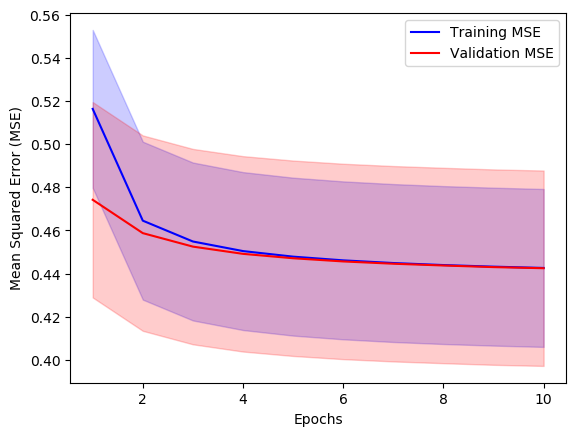

In [12]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
from keras import regularizers
from keras.callbacks import EarlyStopping
# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 32
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
#hidden_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Add L1 regularization to the hidden layer
hidden_layer = Dense(encoding_dim, activation='tanh', kernel_regularizer=regularizers.l1(0.00991))(input_layer)

output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate

opt = Adam(lr= 0.00087)
# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(optimizer=opt, loss='mse')

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []


# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=10,batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
#std_train_mse = np.std(np.array(train_mse), axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)

mean_val_mse = np.mean(val_mse, axis=0)
#std_val_mse = np.std(np.array(val_mse), axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)


# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [13]:
# Generate reconstructed outputs for the test set
reconstructed = autoencoder.predict(X_test)

# Calculate the MSE between the input and the reconstructed output for each data point
recon_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2188/2188 [==============================] - 2s 1ms/step


In [14]:
test_mse_fold = np.mean(recon_errors)
test_mse.append(test_mse_fold)

In [15]:
# Print the final mean and standard deviation of reconstruction error across all folds
print(f"Mean Reconstruction Error: {np.mean(test_mse):.5f}")

Mean Reconstruction Error: 0.43414


In [16]:
mse = autoencoder.evaluate(X_test, X_test)
print('Mean squared error on test data:', mse)

2188/2188 [==============================] - 3s 1ms/step - loss: 0.4343
Mean squared error on test data: 0.43429335951805115


In [17]:
mean_train_mse_avg = np.mean(mean_train_mse)
print("Mean Train MSE (Average):", mean_train_mse_avg)

Mean Train MSE (Average): 0.45550092607736586


In [18]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


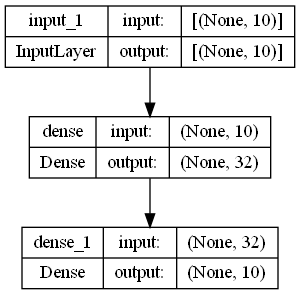

In [19]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder_last.png', show_shapes=True)

In [20]:
# Define the hidden layer model
hidden_layer_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train = hidden_layer_model.predict(X_train_resampled_final)

# Define a new model that takes the output of the hidden layer as input
new_model_input = Input(shape=(hidden_layer_output_train.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.000111))(new_model_input)
# x = Dense(32, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
mediator_network = Model(inputs=new_model_input, outputs=output)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13291/13291 [==============================] - 14s 1ms/step


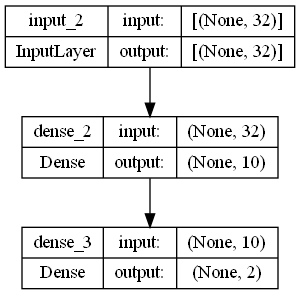

In [21]:
from keras.utils import plot_model
plot_model(mediator_network , to_file='mediator_network .png', show_shapes=True)

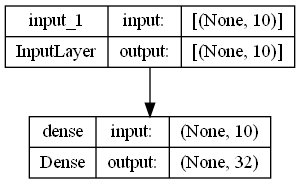

In [22]:
from keras.utils import plot_model
plot_model(hidden_layer_model, to_file='autoencoder_last.png', show_shapes=True)

In [23]:
hidden_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [24]:
mediator_network.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_resampled_final_onehot = to_categorical(y_train_resampled_final)

In [26]:
#opt_new = Adam(lr= 0.000292)
from keras.optimizers import SGD

# opt_new = SGD(lr=0.0002, momentum=0.001)

In [27]:
opt_new = Adam(lr= 0.000992)

In [28]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the new model
mediator_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot,
                               epochs=3, batch_size=32, validation_split=0.07,
                               callbacks=[early_stopping])

# Train the new model on the activations of the hidden layer
#history=mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12347/12361 [============================>.] - ETA: 0s - loss: 0.4378WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000241B7EF85E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the

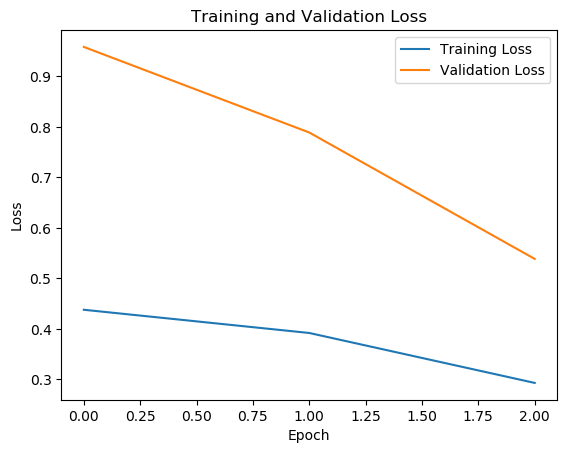

In [29]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
train_loss_mean = sum(history.history['loss']) / len(history.history['loss'])
val_loss_mean = sum(history.history['val_loss']) / len(history.history['val_loss'])

print("Train Loss Mean:", train_loss_mean)
print("Validation Loss Mean:", val_loss_mean)

Train Loss Mean: 0.37414220968882245
Validation Loss Mean: 0.7619186242421468


In [31]:
print(y_train_resampled_final)

0         0
1         0
2         0
3         0
4         0
         ..
425300    1
425301    1
425302    1
425303    1
425304    1
Name: isFraud, Length: 425305, dtype: int64


## Create the agent

In [32]:
# Define the hidden layer model
hidden_layer_model_med = Model(inputs=mediator_network .input, outputs=mediator_network .layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = Input(shape=(hidden_layer_output_train_med.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.000111))(new_model_input_med)
# x = Dense(32, activation='relu')(x)
output_med = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
agent_network = Model(inputs=new_model_input_med, outputs=output_med)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13291/13291 [==============================] - 13s 1ms/step


In [33]:
hidden_layer_model_med.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


In [34]:
# # Define the input layer for the agent network
# agent_input = Input(shape=(hidden_layer_output_train.shape[1],))

# # Define the new Dense layer for the agent network
# x = Dense(4, activation='relu')(agent_input)

# output_agent= Dense(2, activation='sigmoid')(x)

# # Define the agent network model
# agent_network = Model(inputs=agent_input, outputs=output_agent)

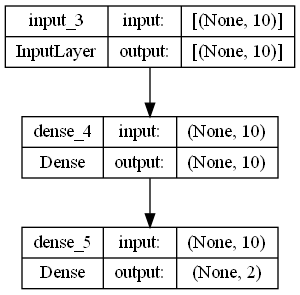

In [35]:
from keras.utils import plot_model
plot_model(agent_network , to_file='agent_network .png', show_shapes=True)

In [36]:
opt_new = Adam(lr= 0.000892)
from keras.optimizers import SGD

#opt_new = SGD(lr=0.000422, momentum=0.00001)

In [37]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the new model
#agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')
# Compile the new model
agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = agent_network.fit(hidden_layer_output_train_med, y_train_resampled_final_onehot,
                               epochs=10, batch_size=32, validation_split=0.03,
                               callbacks=[early_stopping])

# Train the new model on the activations of the hidden layer
#history=mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12884/12893 [============================>.] - ETA: 0s - loss: 0.2508WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000241B7ACB4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

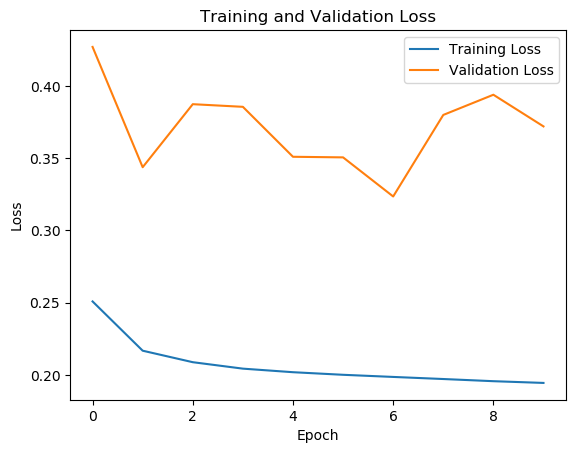

In [38]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
train_loss_mean = sum(history.history['loss']) / len(history.history['loss'])
val_loss_mean = sum(history.history['val_loss']) / len(history.history['val_loss'])

print("Train Loss Mean:", train_loss_mean)
print("Validation Loss Mean:", val_loss_mean)

Train Loss Mean: 0.2068754181265831
Validation Loss Mean: 0.3714128494262695


In [40]:
# # Define the reward function
# def reward_fn(action, label):
#     DF = [0,1,2]  # indices of fraud class
#     DN = [81,    787,   2392,   3121,   3449]  # indices of non-fraud class
#     terminal = 0  # initialize terminal flag to 0
#     if label in DF:
#         if action == label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     else:
#         if action == label:
#             reward = 0.5  # set λ to 0.5
#         else:
#             reward = -0.5  # set λ to -0.5
#     return reward, terminal

In [41]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # # Define the reward function
# # def reward_fn(action, label):
# #     # Replace with your own reward function
# #     if action == label:
# #         return 1
# #     else:
# #         return -1


# # Define hyperparameters
# K = 2  # Number of episodes
# T = 2  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # mediator_network = keras.models.Sequential([
# #     keras.layers.Dense(20, activation='relu', input_shape=(10,)),
# #     keras.layers.Dense(10, activation='softmax')
# # ])
# # mediator_network.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val))

# # Generate dataset D
# # X_train_resampled_final_20 = np.hstack((X_train_resampled_final, np.zeros((X_train_resampled_final.shape[0], 10))))
# # hidden_layer_output = [mediator_network.predict(np.array([x]*2).reshape(2, -1))[0] for x in X_train_resampled_final]
# # D = [(hidden_layer_output[i], y_train_resampled_final[i]) for i in range(len(hidden_layer_output))]

# hidden_layer_output = mediator_network.predict(X_train_resampled_final)
# D = [(hidden_layer_output[i], y_train_resampled_final[i]) for i in range(len(hidden_layer_output))]

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [42]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K = 2  # Number of episodes
# T = 2  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # # Define agent network
# # agent_network = keras.models.Sequential([
# #     keras.layers.Dense(20, activation='relu', input_shape=(10,)),
# #     keras.layers.Dense(10, activation='softmax')
# # ])
# # agent_network.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val))

# # Define reward function
# def reward_fn(action, label):
#     # Replace with your own reward function
#     if action == label:
#         return 1
#     else:
#         return -1

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     #np.random.shuffle(D)
#     # Shuffle the training data
#     D=np.random.shuffle(X_train_resampled_final)

    
#     # Initialize state
#     #state = D[0][0]
#     # Initialize state

#     #state = X_train_resampled_final[0]
#     state = X_train_resampled_final[0][:7]

#     #state = X_train_resampled_final[0].reshape(1, -1)

    
#     for t in range(T):
#         # Choose action
#         #action = agent_network.predict(state.reshape(1, -1)).argmax()
#         action = agent_network.predict(state.reshape(1, 7)).argmax()

        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [43]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# K=25
# batch_size = 32

# # Train agent
# for k in range(K):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [44]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# KC=10
# batch_size = 32

# # Train agent
# for k in range(KC):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# KC7=2
# batch_size = 32

# # Train agent
# for k in range(KC7):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# K1=5
# batch_size = 32

# # Train agent
# for k in range(K1):
#     # Initialize state
#     state = D[0][0]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, state.shape[0]))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break


## New trial

In [51]:
# # Define the reward function
# def reward_fn(action, label):
#     DF = [0,1,2]  # indices of fraud class
#     DN = [81,    787,   2392,   3121,   3449]  # indices of non-fraud class
#     terminal = 0  # initialize terminal flag to 0
#     if label in DF:
#         if action == label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     else:
#         if action == label:
#             reward = 0.5  # set λ to 0.5
#         else:
#             reward = -0.5  # set λ to -0.5
#     return reward, terminal

In [55]:
# Define the reward function
def reward_fn(action, label):
    terminal = 0  # initialize terminal flag to 0
    if label in [0, 1, 2]:
        if action == label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    else:
        if action == label:
            reward = 0.5  # set λ to 0.5
        else:
            reward = -0.5  # set λ to -0.5
    return reward, terminal

In [59]:
import numpy as np
import keras
from keras import models, layers
import random

# Shuffle the training data
X_train_shuffled = np.random.permutation(X_train_resampled_final)
D = list(zip(X_train_shuffled, y_train_resampled_final))

# Initialize replay memory with M capacity
M = 10000
replay_memory = []

# Initialize simulation environment
env = None  # Replace with your own simulation environment

# Define hyperparameters
K2 = 5  # Number of episodes
T = 3  # Number of timesteps per episode
gamma = 0.9  # Discount factor
batch_size = 32
learning_rate_val = 0.001

# Train agent
for k in range(K2):
    # Shuffle dataset D
    np.random.shuffle(D)
    
    # Initialize state
    state = D[0][0]
    
    for t in range(T):
        # Choose action
        action = agent_network.predict(state.reshape(1, -1)).argmax()
        
        # Calculate reward and terminal flag
        reward = reward_fn(action, D[t][1])
        terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        # Calculate reward and terminal flag
        true_label = D[t][1]
        print("Reward:", reward)
        print("True label in dataset is:", true_label, ", agent has predicted", action)
        print("Terminal:", terminal)

        
        # Update state
        state_next = D[t+1][0] if t < T - 1 else state
        
        # Store transition in replay memory
        replay_memory.append((state, action, reward, state_next, terminal))
        if len(replay_memory) > M:
            replay_memory.pop(0)
        
        # Sample minibatch from replay memory
        if len(replay_memory) >= batch_size:
            minibatch = random.sample(replay_memory, batch_size)
        else:
            continue

        X = np.zeros((batch_size, 10))
        y = np.zeros((batch_size, 10))
        for i in range(batch_size):
            state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
            X[i] = state_i
            y[i] = agent_network.predict(state_i.reshape(1, -1))
            if terminal_i:
                y[i][action_i] = reward_i
            else:
                y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
        # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
        agent_network.train_on_batch(X, y)
        
        # Update state
        state = state_next
        
        # Check if episode is over
        if terminal:
            break

1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 1 , agent has predicted 1
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label in dataset is: 0 , agent has predicted 1
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label in dataset is: 0 , agent has predicted 1
Terminal: 1
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 1 , agent has predicted 1
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 1 , agent has predicted 1
Terminal: 0
1/1 [==============================] - 0s 31ms/step
Reward: (1, 0)
True label in dataset is: 1 , agent has predicted 1
Terminal: 1
1/1 [==============================] - 0s 31ms/step
Reward: (1, 0)
True label in dataset is: 0 , agent has predicted 0
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in 

1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label in dataset is: 1 , agent has predicted 0
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 0 , agent has predicted 0
Terminal: 0
1/1 [==============================] - 0s 19ms/step
Reward: (1, 0)
True label in dataset is: 0 , agent has predicted 0
Terminal: 1
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 0 , agent has predicted 0
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (1, 0)
True label in dataset is: 0 , agent has predicted 0
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label in dataset is: 1 , agent has predicted 0
Terminal: 1
1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label in dataset is: 0 , agent has predicted 1
Terminal: 0
1/1 [==============================] - 0s 16ms/step
Reward: (-1, 1)
True label i

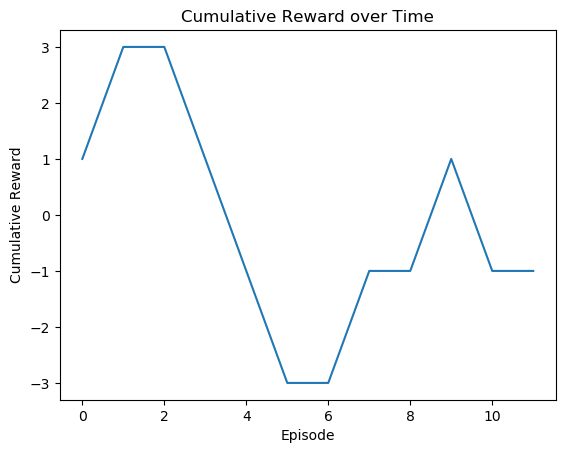

In [65]:
import numpy as np
import keras
from keras import models, layers
import random

# Shuffle the training data
X_train_shuffled = np.random.permutation(X_train_resampled_final)
D = list(zip(X_train_shuffled, y_train_resampled_final))

# Initialize replay memory with M capacity
M = 10000
replay_memory = []

# Initialize an empty list to store the cumulative reward obtained by the agent over time
cumulative_rewards = []

# Initialize simulation environment
env = None  # Replace with your own simulation environment

# Define hyperparameters
K2 = 5  # Number of episodes
T = 3  # Number of timesteps per episode
gamma = 0.9  # Discount factor
batch_size = 32
learning_rate_val = 0.001

# Train agent
for k in range(K2):
    # Shuffle dataset D
    np.random.shuffle(D)
    
    # Initialize state
    state = D[0][0]
    
    for t in range(T):
        # Choose action
        action = agent_network.predict(state.reshape(1, -1)).argmax()
        
        # Calculate reward and terminal flag
        reward = reward_fn(action, D[t][1])
        terminal = 1 if t == T - 1 else 0
        # print("Reward:", reward) # Add this line to print the reward
        # print("Terminal:", terminal) # Add this line to print the terminal flag
        # Calculate reward and terminal flag
        true_label = D[t][1]
        print("Reward:", reward)
        print("True label in dataset is:", true_label, ", agent has predicted", action)
        print("Terminal:", terminal)
        
        # Compute the cumulative reward obtained by the agent for this episode
        episode_reward = 0
        if len(replay_memory) >= T:
            for t_ in range(T):
                episode_reward += replay_memory[-T+t_][2][0]
            cumulative_rewards.append(episode_reward)

        # Update state
        state_next = D[t+1][0] if t < T - 1 else state
        
        # Store transition in replay memory
        replay_memory.append((state, action, reward, state_next, terminal))
        if len(replay_memory) > M:
            replay_memory.pop(0)
        
        # Sample minibatch from replay memory
        if len(replay_memory) >= batch_size:
            minibatch = random.sample(replay_memory, batch_size)
        else:
            continue

        X = np.zeros((batch_size, 10))
        y = np.zeros((batch_size, 10))
        for i in range(batch_size):
            state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
            X[i] = state_i
            y[i] = agent_network.predict(state_i.reshape(1, -1))
            if terminal_i:
                y[i][action_i] = reward_i
            else:
                y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
        # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
        agent_network.train_on_batch(X, y)
        
        # Update state
        state = state_next
        
        # Check if episode is over
        if terminal:
            break
            
# Plot the cumulative reward obtained by the agent over time
import matplotlib.pyplot as plt
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Time')
plt.show()

In [53]:
# def reward_fn(action, label):
#     DF = [0, 1, 2]  # indices of fraud class
#     DN = [81, 787, 2392, 3121, 3449]  # indices of non-fraud class
#     terminal_flag = 0  # initialize terminal flag to 0
#     if label in DF:
#         if action == label:
#             reward = 1
#             terminal_flag = 1
#         else:
#             reward = -1
#             terminal_flag = 1
#     else:
#         if action == label:
#             reward = 1
#         else:
#             reward = -0.5  # set λ to -0.5
#     return reward, terminal_flag

In [54]:
# import random

# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K = 10  # Number of episodes
# T = 4  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # Randomly initialize parameters θ
# theta = np.random.rand(10, 10)

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
#     for t in range(T):
#         # Choose action based on the policy πθ (s,a)
#         logits = np.dot(state, theta)
#         action_probs = np.exp(logits) / np.sum(np.exp(logits))
#         #action = np.random.choice(range(2), p=action_probs)
#         action = np.random.choice(range(len(action_probs)), p=action_probs)

        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
        
#         true_label = D[t][1]
#         print("Reward:", reward)
#         predicted_label = agent_network.predict(state.reshape(1, -1)).argmax()
#         print("True label:", true_label)
#         print("Predicted label:", predicted_label)

        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 # Choose action based on the policy πθ (s,a) for the next state
#                 logits_next = np.dot(state_next_i, theta)
#                 action_probs_next = np.exp(logits_next) / np.sum(np.exp(logits_next))
#                 next_action = np.random.choice(range(10), p=action_probs_next)
#                 y[i][action_i] = reward_i + gamma * y[i][next_action]
        
#         # Train agent network on minibatch using gradient descent
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
state_i.shape

In [ ]:
output = agent_network.predict(state_i.reshape(1, -1))
print(output.shape)

In [ ]:
X.shape

In [ ]:
# Initialize an empty list to store the cumulative reward obtained by the agent over time
cumulative_rewards = []

for k in range(K):
    # your existing code for training the agent

    # Compute the cumulative reward obtained by the agent for this episode
    episode_reward = sum([t[2] for t in replay_memory[-T:]])
    cumulative_rewards.append(episode_reward)

# Plot the cumulative reward obtained by the agent over time
import matplotlib.pyplot as plt
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Time')
plt.show()

In [58]:
# Initialize an empty list to store the cumulative reward obtained by the agent over time
cumulative_rewards = []

for k in range(K):
    # your existing code for training the agent
    
    # Compute the cumulative reward obtained by the agent for this episode
    episode_reward = 0
    for t in range(T):
        episode_reward += replay_memory[-T+t][2]
    cumulative_rewards.append(episode_reward)
    
# Plot the cumulative reward obtained by the agent over time
import matplotlib.pyplot as plt
plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Time')
plt.show()

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'